<font size=+3 color="#3D3D3D"><center><b>Bike Sharing Data Analysis(Aug-21 to July-22)  🚴 </b></center></font>

</center><img src="https://images.unsplash.com/photo-1527820096401-94c521276f59?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1740&q=80" width = 800></center>
<center><em>Photo by Ankush Minda (Unsplash)</em></center>
</b>

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import timedelta
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"
print('✔️ Libraries imported successfully!')

✔️ Libraries imported successfully!


### Read cleaned bike sharing data for 2021-22

In [2]:
df = pd.read_csv("bike_sharing_cleaned_2021-2022.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114485 entries, 0 to 5114484
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_time_minutes   float64
 14  day                 object 
dtypes: float64(5), object(10)
memory usage: 585.3+ MB


In [3]:
# converting "started_at" & "ended_at" columns in datetime format
df["started_at"] = pd.to_datetime(df["started_at"], infer_datetime_format=True)
df["ended_at"] = pd.to_datetime(df["ended_at"], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114485 entries, 0 to 5114484
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_time_minutes   float64       
 14  day                 object        
dtypes: datetime64[ns](2), float64(5), object(8)
memory usage: 585.3+ MB


##### Creating month field with format "month_year"

In [4]:
df['month'] = df['started_at'].dt.strftime('%b_%Y')

##### Creating time_started field by rounding the started_at field to nearest minute and extracting time element

In [5]:
def minute_rounder(t):
    '''
    Takes input t as datetime object.
    Rounds to nearest minute by adding a timedelta minute if second >= 30
    '''

    t = t.replace(second=0, minute=t.minute, hour=t.hour) + timedelta(minutes=t.second//30)
    # extracting time from datetime
    t = t.time()
        
    return (t)
print('✔️ Function defined!')

✔️ Function defined!


In [6]:
df["time_started"] = df.started_at.apply(lambda x : minute_rounder(x))

## Analysis

### Top 10 start and end stations for members and casual riders

In [7]:
def top_station(rider_type,feature,top_result):
    '''
    Ploting bar plot of top visiting stations
    input - 
    rider_type -: Plot for category e.g. "member" or "casual" or "all"
    feature -: feature to plot e.g. "start_station_name", "end_station_name"
    top_result -: int(number), number of top records to plot e.g. 5
    '''
    if (rider_type == "member") | (rider_type == "casual"):
        df_temp = df[df["member_casual"] == rider_type]
    elif (rider_type == "all"):
        df_temp = df
    else:
        return(print('Enter correct rider type "member" or "casual" or "all"'))
    df_temp = df_temp[feature].value_counts().reset_index(name = 'count').rename({'index': feature}, axis='columns')
    sum_count = df_temp["count"].sum()
    df_temp = df_temp[:top_result]
    sum_count_top = df_temp["count"].sum()
    df_temp.sort_values(by = ['count'], inplace = True)
    fig = px.bar(df_temp, x='count', y=feature, text_auto=True,
                 labels={"count": "Total Rides"}
                )
    fig.update_layout(title = f'Top {top_result} {feature} for {rider_type} riders with {round(sum_count_top *100/sum_count)}% of total {rider_type} rides', title_x=0.5)
    fig.show()
    
    
print('✔️ Function defined!')

✔️ Function defined!


In [8]:
def top_station_map(rider_type,feature,top_result):
    
    '''
    Ploting bar plot of top visiting stations
    input - 
    rider_type -: Plot for category e.g. "member" or "casual" or "all"
    feature -: feature to plot e.g. "start_station_name", "end_station_name"
    top_result -: int(number), number of top records to plot e.g. 5
    '''

    rider_list = ["all","member","casual"]
    if (feature == "start_station_name") & (rider_type in rider_list):
        feature_name = "Start Stations"
        map_lat = "start_lat"
        map_lng = "start_lng"
        if ((rider_type == "member") | (rider_type == "casual")):
            df_temp = df[(df.member_casual == rider_type)].groupby(
            [feature, map_lat, map_lng]
            ).ride_id.count().reset_index().sort_values(by = ['ride_id'], ascending=False)
        elif (rider_type == "all"):
            df_temp = df.groupby(
            [feature, map_lat, map_lng]
            ).ride_id.count().reset_index().sort_values(by = ['ride_id'], ascending=False)
    elif (feature == "end_station_name") & (rider_type in rider_list):
        feature_name = "End Stations"
        map_lat = "end_lat"
        map_lng = "end_lng"
        
        if ((rider_type == "member") | (rider_type == "casual")):
            df_temp = df[(df.member_casual == rider_type)].groupby(
            [feature, map_lat, map_lng]
            ).ride_id.count().reset_index().sort_values(by = ['ride_id'], ascending=False)
        elif (rider_type == "all"):
            df_temp = df.groupby(
            [feature, map_lat, map_lng]
            ).ride_id.count().reset_index().sort_values(by = ['ride_id'], ascending=False)
        
    else:
        return(print('Enter correct rider type("member" or "casual" or "all") or feature name("start_station_name" or "end_station_name")'))
    
    sum_count = df_temp["ride_id"].sum()
    df_temp = df_temp[:top_result]
    sum_count_top = df_temp["ride_id"].sum()
    df_temp.sort_values(by = ['ride_id'], inplace = True)
    # print(df_temp)
    fig = px.scatter_mapbox(df_temp,lat= map_lat,lon= map_lng, center = dict(lat =41.896624 , lon = -87.635493),
                            mapbox_style = "open-street-map" , hover_name = feature, zoom = 12, size = "ride_id", color = "ride_id",
                            color_continuous_scale=px.colors.sequential.Bluered,
                            labels={"ride_id": "Total Rides",
                                    "routes": "Routes",
                                    feature : feature_name})
    
    fig.update_layout(title = f'Map of top {top_result} {feature_name} for {rider_type}  with {round(sum_count_top *100/sum_count)}% of total {rider_type} non-round trip rides', title_x=0.5)
    fig.show()
print('✔️ Function defined!')


✔️ Function defined!


In [9]:
top_station("member","start_station_name",5)

In [10]:
top_station_map("member","start_station_name",5)

In [11]:
top_station("member","end_station_name",5)

In [12]:
top_station_map("member","end_station_name",5)

#### Following are the observations - 

 - Top 5 start and end stations are almost same for member riders, indicating strong hotspot station area for members riders.
 - **Kingsbury St & Kinzie St** station is most popular station among members with more than **50K start and end station points combined** in past one year.
 - Difference between number of rides of Top station and 5th top station is of approx **6K** rides with number of rides for top and 5th top station are **25K** and **19k** respectively.   

In [13]:
top_station("casual","start_station_name",5)

In [14]:
top_station_map("casual","start_station_name",5)

In [15]:
top_station("casual","end_station_name",5)

In [16]:
top_station_map("casual","end_station_name",5)

#### Following are the observations - 

 - Top 5 start and end stations are almost same for casual riders, indicating strong hotspot station area for casual riders.
 - **Streeter Dr & Grand Ave** station is most popular station among casual riders with more than **123K ride start and end station points combined** in past one year.
 - Difference between number of rides of Top station and 5th top station is of approx **34K** rides which is huge as compare to member **(6K)**, with number of rides for top and 5th top station are approx **61K** and **27k** respectively.
 - It is interesting to note that top 5 start & end station for casual riders contains **8%** of total casual rides while for members it is **4%**, which indicates that **casual rides are more concentrated to these stations while member rides are more spread out to other stations**

### Popular routes

In [17]:
# top round trip stations
def top_round_trip(rider_type,top_result):
    
    '''
    Ploting bar plot of top visiting stations for round trips
    input - 
    rider_type -: Plot for category e.g. "member" or "casual or "all
    top_result -: int(number), number of top records to plot e.g. 5
    '''
    if (rider_type == "member") | (rider_type == "casual"):
        df_temp = df[df["member_casual"] == rider_type]
    elif (rider_type == "all"):
        df_temp = df
    else:
        return(print('Enter correct rider type "member" or "casual" or "all"'))
    
    df_temp = df_temp[(df_temp.start_station_name) == (df_temp.end_station_name)
                     ][['start_station_name','end_station_name']
                      ].value_counts().reset_index(name = 'count')
    sum_count = df_temp["count"].sum()
    df_temp = df_temp[:top_result]
    sum_count_top = df_temp["count"].sum()

    df_temp.sort_values(by = ['count'], inplace = True)
    
    fig = px.bar(df_temp, x='count', y="start_station_name", text_auto=True,
                 labels={"count": "Total Rides",
                        "start_station_name": "Station Name"}
                )
    fig.update_layout(title = f'Top {top_result} round trip stations for {rider_type} riders with {round(sum_count_top *100/sum_count)}% of total {rider_type} round trip rides', title_x=0.5)
    fig.show()
print('✔️ Function defined!')

✔️ Function defined!


In [18]:
def top_round_trip_map(rider_type,top_result):
    
    '''
    Ploting map of top visiting stations for round trips
    input - 
    rider_type -: Plot for category e.g. "member" or "casual or "all
    top_result -: int(number), number of top records to plot e.g. 5
    '''

    if (rider_type == "member") | (rider_type == "casual"):
        df_temp = df[df["member_casual"] == rider_type]
    elif (rider_type == "all"):
        df_temp = df
    else:
        return(print('Enter correct rider type "member" or "casual" or "all"'))
    
    df_temp = df_temp[(df_temp.start_station_name) == (df_temp.end_station_name)
                     ][['start_station_name','start_lat', 'start_lng']
                      ].value_counts().reset_index(name = 'count')
    sum_count = df_temp["count"].sum()
    df_temp = df_temp[:top_result]
    sum_count_top = df_temp["count"].sum()

    df_temp.sort_values(by = ['count'], inplace = True)
    
    fig = px.scatter_mapbox(df_temp,lat= "start_lat",lon= "start_lng", center = dict(lat =41.896624 , lon = -87.635493),
                            mapbox_style = "open-street-map" , hover_name = "start_station_name", zoom = 8, size = "count", color = "count",
                            color_continuous_scale=px.colors.sequential.Bluered,
                            labels={"count": "Total Rides",
                                    "start_station_name": "Station name",
                                    })
    
    fig.update_layout(title = f'Top {top_result} round trip stations map for {rider_type} riders with {round(sum_count_top *100/sum_count)}% of total {rider_type} round trip rides', title_x=0.5)
    fig.show()
print('✔️ Function defined!')

✔️ Function defined!


In [19]:
top_round_trip("member",5)

In [20]:
top_round_trip_map("member",5)

#### Following are the observations - 
    
    
 - Total member round trips are just **4%**(120K rides) of all member ride trips.
 
 - **Harold Washington Park** station is most popular round trip station among member riders with approx **6.6K rides** in past one year, as next to it "Public Rack - Cicero Ave & Cortland St - midblock" station only got **1.5K** round trip rides.
 - Also **Harold Washington Park** and **Hyde Park Blvd & 55th St** has same lattitude and longitude data. It can be infered that they are close to each other.

In [21]:
top_round_trip("casual",5)

In [22]:
top_round_trip_map("casual",5)

#### Following are the observations - 
    
    
 - Total casual riders round trips are **9%**(203K rides) of all casual ride trips.
 
 - **Streeter Dr & Grand Ave** station is most popular round trip station among casual riders with approx **10.6K rides** in past one year.
 
 - It is interesting to note that out of **5** top round trip stations **4** stations are **same** as in top 5 start & end stations for casual riders. **"Streeter Dr & Grand Ave"** is an important station for casual riders as it **topped start, end and round trip stations list**

In [23]:
# Popular routes
def popular_routes(rider_type,top_result):
    
    '''
    Ploting bar plot of popular trip routes
    input - 
    rider_type -: Plot for category e.g. "member" or "casual" or "all"
    top_result -: int(number), number of top records to plot e.g. 5
    '''
    
    
    if (rider_type == "member") | (rider_type == "casual"):
        df_temp = df[((df.start_station_name) != (df.end_station_name)) & (df.member_casual == rider_type)].groupby(
        ['start_station_name','end_station_name','start_lat','start_lng','end_lat','end_lng']
        ).ride_id.count().reset_index().sort_values(by = ['ride_id'], ascending=False)
    elif (rider_type == "all"):
        df_temp = df[((df.start_station_name) != (df.end_station_name))].groupby(
        ['start_station_name','end_station_name','start_lat','start_lng','end_lat','end_lng']
        ).ride_id.count().reset_index().sort_values(by = ['ride_id'], ascending=False)
    else:
        return(print('Enter correct rider type "member" or "casual" or "all"'))
    
    sum_count = df_temp["ride_id"].sum()
    df_temp = df_temp[:top_result]
    sum_count_top = df_temp["ride_id"].sum()
    df_temp["routes"] = df_temp['start_station_name'] + "--to--" + df_temp["end_station_name"]
    df_temp.sort_values(by = ['ride_id'], inplace = True)
    
    fig = px.bar(df_temp, x='ride_id', y="routes", text_auto=True,
                 labels={"ride_id": "Total Rides",
                        "routes": "Routes"}
                )
    fig.update_layout(title = f'Top {top_result} popular routes for {rider_type}  with {round(sum_count_top *100/sum_count)}% of total {rider_type} non-round trip rides', title_x=0.5)
    fig.show()
print('✔️ Function defined!')

✔️ Function defined!


In [24]:
popular_routes("member",5)

In [25]:
popular_routes("casual",5)

#### Following are the observations - 
    
    
 - As there are **162K** ride routes with different start and end station for **members** and **166K** for **casual riders**. Top 5 or 10 routes doesn't account for significant number of rides
 
 - For casual riders all popular routes consits of stations that are in top start and end stations.

### Bike Type Analysis

#### Prepare bike summary dataframe for member and casual riders

In [26]:
temp_df1 = df[df["member_casual"] == "member"].groupby(['rideable_type'])['ride_id'].agg(['count'])
member_count = temp_df1["count"].sum()
temp_df1["percent_ride"] = round(temp_df1["count"]*100/member_count,2)
temp_df1['Rider_type'] = "member"
temp_df1.reset_index(inplace = True)

temp_df2 = df[df["member_casual"] == "casual"].groupby(['rideable_type'])['ride_id'].agg(['count'])
casual_count = temp_df2["count"].sum()
temp_df2["percent_ride"] = round(temp_df2["count"]*100/casual_count,2)
temp_df2['Rider_type'] = "casual"
temp_df2.reset_index(inplace = True)

df_bike_summary = pd.concat([temp_df1, temp_df2]).reset_index(drop = True)

df_bike_summary

,rideable_type,count,percent_ride,Rider_type
0,classic_bike,1901577,64.59,member
1,electric_bike,1042365,35.41,member
2,classic_bike,1121079,51.65,casual
3,docked_bike,223945,10.32,casual
4,electric_bike,825519,38.03,casual


##### Plotting bar plot to get bike wise breakup for member and casual riders

In [27]:
fig = px.bar(df_bike_summary, x="rideable_type", y="count",
             color='Rider_type', barmode='group',text_auto=True,
                  labels={"rideable_type": "Bike Type",
                        "count": 'Number of rides'})
fig.update_layout(title = f'Bike prefrence for member and casual riders', title_x=0.5)
fig.show()

##### Plotting bar plot for % of member and casual rides on bikes. e.g. for member rides how much % rides are on classic bike , electric bike

In [28]:
fig = px.bar(df_bike_summary, x="rideable_type", y="percent_ride",
             color='Rider_type', barmode='group',text_auto=True,
                  labels={"rideable_type": "Bike Type",
                        "percent_ride": 'Ride percentage(%)'})
fig.update_layout(title = f'Bike use % for member and casual rides', title_x=0.5)
fig.show()

### Folowing are the observations - 

- For both members and casual rides classic bike is most used and after that electric bike is used.
- Docked bike is only used for casual rides.
- For electric bike, number of member rides are **216K** more than casual rides but **38%** of casual rides is on electric bike as compare to **35%** of member rides.

### Ride time analysis

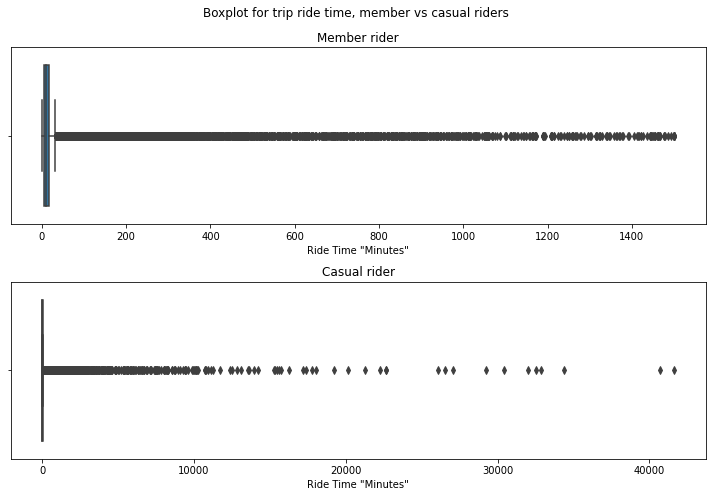

In [32]:
 
fig, (ax1, ax2) = plt.subplots(2, figsize = (10,7))
#create seaborn histogram
sns.boxplot(x = df[df["member_casual"] == "member"]['ride_time_minutes'], ax = ax1)
sns.boxplot(x = df[df["member_casual"] == "casual"]['ride_time_minutes'], ax = ax2)
#specfiy axis labels
ax1.set(xlabel='Ride Time "Minutes"',
       title=f'Member rider')
ax2.set(xlabel='Ride Time "Minutes"',
       title=f'Casual rider')
fig.suptitle(f'Boxplot for trip ride time, member vs casual riders')
#display barplot
plt.tight_layout()


In [33]:
df_ride_time = pd.DataFrame()
df_ride_time['Member'] = round(df[df["member_casual"] == "member"].ride_time_minutes.describe(),2)
df_ride_time['Casual'] = round(df[df["member_casual"] == "casual"].ride_time_minutes.describe(),2)
df_ride_time.T

,count,mean,std,min,25%,50%,75%,max
Member,2943942.0,12.81,18.45,1.0,5.0,9.0,16.0,1500.0
Casual,2170543.0,25.85,118.09,1.0,9.0,15.0,27.0,41629.0


### Folowing are the observations - 

- Members took **35%** more *rides* as comapare to casual riders
- However *mean ride time* of casual riders are **101%** more than that of members.
- There are huge outliers like for member riders the maximum ride time is **1500 minutes** which roughly accounts for **24 hours**. whereas **75%** rides has time **less than 16 minutes**
- For casual riders maximum ride time goes over **40000 minutes** which is roughly equal to **28 days**. whereas **75%** rides has time **less than 27 minutes**
- Mean values are highly impacted by big outliers, hence in our case median gives us more appropriate estimation of average ride time 
- *Median* ride time for members and casual riders are **9** and **15** minutes respectively, i.e. *casual riders* ride time is **66%** more than that of member riders. 

#### Ride time analysis Daywise

##### Prepare daywise summary dataframe for member and casual riders

In [34]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']
temp_df1 = df[df["member_casual"] == "member"].groupby(['day'])['ride_time_minutes'].agg(['median','mean','max', 'min','count']).reindex(cats)
temp_df1['Rider_type'] = "member"
temp_df1.reset_index(inplace = True)
temp_df2 = df[df["member_casual"] == "casual"].groupby(['day'])['ride_time_minutes'].agg(['median','mean','max', 'min','count']).reindex(cats)
temp_df2['Rider_type'] = "casual"
temp_df2.reset_index(inplace = True)
df_day_summary = pd.concat([temp_df1, temp_df2]).reset_index(drop = True)

df_day_summary

,day,median,mean,max,min,count,Rider_type
0,Monday,9.0,12.413465,1500.0,1.0,413360,member
1,Tuesday,9.0,11.992415,1500.0,1.0,459569,member
2,Wednesday,9.0,12.128772,1500.0,1.0,458359,member
3,Thrusday,9.0,12.286887,1476.0,1.0,455012,member
4,Friday,9.0,12.503367,1500.0,1.0,403769,member
5,Saturday,10.0,14.356297,1500.0,1.0,392033,member
6,Sunday,10.0,14.511041,1486.0,1.0,361840,member
7,Monday,15.0,26.719650,32035.0,1.0,257022,casual
8,Tuesday,13.0,22.525753,15483.0,1.0,233157,casual
9,Wednesday,13.0,22.194330,30401.0,1.0,239850,casual


##### Plotting bar plot to get daywise breakup of median ride time for member and casual riders

In [35]:
fig = px.bar(df_day_summary, x="day", y="median",
             color='Rider_type', barmode='group',text_auto=True,
                  labels={"day": "Day",
                        "median": 'Median ride time "Minutes"'})
fig.update_layout(title = f'Daywise breakup of median ride time for member and casual riders', title_x=0.5)
fig.show()

#### Following are the observations - 
    
    
 - Median ride time for members is consistent throughout the weekdays and increased slightly on weekends.
 
 - For casual riders ride time first decrease after monday, then remain constant for tuesday to thursday, then again start increasing from friday and remain high for saturday and sunday.
 
 - Ride time for both members and casual riders increased on weekends, overall casual riders median ride time is more from members. 

##### counting daywise breakup of number of rides

In [36]:

fig = px.bar(df_day_summary, x="day", y="count",
             color='Rider_type', barmode='group',text_auto=True,
                  labels={"day": "Day",
                        "count": 'Number of rides'})
fig.update_layout(title = f'Daywise breakup of number of rides for member and casual riders', title_x=0.5)
fig.show()


#### Following are the observations - 
    
    
 - Number of rides for members is consistent throughout the weekdays and decreased slightly on weekends.
 
 - For casual riders number of rides are less on weekdays and increases on weekends.
 
 - Members have more number of ride than casual riders on weekdays, but on weekends casual riders have more number of rides.
 
 - Overall members have **35%(773K)** more number rides as compare to casual members

##### Prepare monthwise summary dataframe for member and casual riders

In [37]:
cats = [ 'Jan_2022', 'Feb_2022', 'Mar_2022', 'Apr_2022', 'May_2022', 'Jun_2022', 'Jul_2022', 'Aug_2021','Sep_2021','Oct_2021','Nov_2021','Dec_2021']

temp_df1 = df[df["member_casual"] == "member"].groupby(['month'])['ride_time_minutes'].agg(['median','mean','max', 'min','count']).reindex(cats)
temp_df1['Rider_type'] = "member"
temp_df1.reset_index(inplace = True)

temp_df2 = df[df["member_casual"] == "casual"].groupby(['month'])['ride_time_minutes'].agg(['median','mean','max', 'min','count']).reindex(cats)
temp_df2['Rider_type'] = "casual"
temp_df2.reset_index(inplace = True)

df_month_summary = pd.concat([temp_df1, temp_df2]).reset_index(drop = True)

df_month_summary

,month,median,mean,max,min,count,Rider_type
0,Jan_2022,8.0,11.072866,1500.0,1.0,75522,member
1,Feb_2022,8.0,11.071371,1466.0,1.0,82470,member
2,Mar_2022,8.0,12.001703,1500.0,1.0,167913,member
3,Apr_2022,8.0,11.759198,1500.0,1.0,205152,member
4,May_2022,10.0,13.397658,1500.0,1.0,307453,member
5,Jun_2022,10.0,13.793430,1324.0,1.0,350656,member
6,Jul_2022,10.0,13.616071,1477.0,1.0,357623,member
7,Aug_2021,10.0,13.842347,1486.0,1.0,357145,member
8,Sep_2021,10.0,13.460808,1318.0,1.0,354905,member
9,Oct_2021,9.0,12.334347,1500.0,1.0,321968,member


##### Plotting bar plot to get monthwise breakup of median ride time for member and casual riders

In [38]:
fig = px.bar(df_month_summary, x="month", y="median",
             color='Rider_type', barmode='group',text_auto=True,
                  labels={"day": "Month",
                        "median": 'Median ride time "Minutes"'})
fig.update_layout(title = f'Monthwise breakup of median ride time for member and casual riders', title_x=0.5)
fig.show()


#### Following are the observations - 
    
    
 - For members median ride time is consistent most in spring and summer season **(May to September)** and again it decreases before onset of winters and remains constant **(November to April)**.
 
 - For casual riders median ride time is not consistent althogh it remains high but fluctuate up and down from **March to October**, and then it decreases in winters and fluctuating up and down from **November to Feburary**.
 
 - Ride time for both members and casual riders **increased in spring and summer while decrease in winters**, overall casual riders median ride time is more from members.

##### counting monthwise breakup of number of rides

In [39]:
fig = px.bar(df_month_summary, x="month", y="count",
             color='Rider_type', barmode='group',text_auto=True,
                  labels={"month": "Month",
                        "count": 'Number of rides'})
fig.update_layout(title = f'Monthwise breakup of number of rides for member and casual riders', title_x=0.5)
fig.show()


#### Following are the observations - 
    
    
 - Total number of rides for both members and casual riders increased consistently upto August and then again start declining consistently from August.
 
 - Only difference between ride counts of members and casual riders are that members rides are increased and decreased smoothly as compare to casual riders. i.e. for members it didn't go too low from November to December.
 
 - Overall members have **35%(773K)** more number rides as compare to casual members.

### Start time analysis for members and casual riders

In [40]:
# plotting histogram of ride start time
fig = px.histogram(df.sort_values(by = ['time_started']), x="time_started",color = "member_casual", barmode="group",
                  labels={"time_started": "Trip start time",
                        "count": 'Number of rides',
                         "member_casual": "Rider Type"})

fig.update_layout(title = f'Trip start time breakup for member vs casual riders', title_x=0.5)
fig.show()

#### Following are the observations - 
    
    
 - For members there is a small peak time in morning from 7:30 A.M to 8:45 A.M then it droped and pick up again at around 12:00 after that it remained constant around 3:00 P.M, in evening a huge peak appears at around 4:00 P.M and remain upto 6:45 P.M. Morning and evening peak time indicates majority of members using cycle rides for office commute.
 
 - For Casual riders there is no peak at morning time but it starts increasing throughout the day and reach its peak at around 4:00 P.M to 6:45 P.M.
 .